In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In this project, we used the Crop Recommendation Dataset from Kaggle, which contains detailed information on soil nutrients (nitrogen, phosphorus, potassium) and environmental factors (temperature, humidity, pH, and rainfall) that influence crop suitability. Additionally, we referenced the same data as found on the Harvard Dataverse, where it has been utilized for similar agricultural and environmental analyses. By acknowledging both sources, we establish the credibility and prior use of this dataset in crop recommendation research, ensuring a comprehensive foundation for our interactive data visualizations.
Dataset(Kaggle): https://www.kaggle.com/datasets/varshitanalluri/crop-recommendation-dataset/data <br>
Dataset(Harvard): https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/4GBWFV

In [12]:
# Load the dataset
crop_data = pd.read_csv('crop_recommendation.csv')

In [13]:
crop_data.head()

N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [14]:
crop_data.describe

<bound method NDFrame.describe of         N   P   K  temperature   humidity        ph    rainfall   label
0      90  42  43    20.879744  82.002744  6.502985  202.935536    rice
1      85  58  41    21.770462  80.319644  7.038096  226.655537    rice
2      60  55  44    23.004459  82.320763  7.840207  263.964248    rice
3      74  35  40    26.491096  80.158363  6.980401  242.864034    rice
4      78  42  42    20.130175  81.604873  7.628473  262.717340    rice
...   ...  ..  ..          ...        ...       ...         ...     ...
2195  107  34  32    26.774637  66.413269  6.780064  177.774507  coffee
2196   99  15  27    27.417112  56.636362  6.086922  127.924610  coffee
2197  118  33  30    24.131797  67.225123  6.362608  173.322839  coffee
2198  117  32  34    26.272418  52.127394  6.758793  127.175293  coffee
2199  104  18  30    23.603016  60.396475  6.779833  140.937041  coffee

[2200 rows x 8 columns]>

Nitrogen Levels:

The nitrogen (N) values range from 60 to 118, with a mean of 93.2. This suggests that while nitrogen levels vary, they are generally moderate to high across the samples. High nitrogen levels are beneficial for leafy crops but may need to be balanced for other crop types.
Phosphorus and Potassium Distribution:

Phosphorus (P) has a broader range, from 15 to 58, with an average of 36.4, indicating greater variability. Potassium (K) ranges from 27 to 44, with a mean of 36.3, showing more consistency compared to phosphorus.
This variability in phosphorus levels could be significant for root development in certain crops, while the more stable potassium levels might reflect a common baseline requirement for crop health.
Temperature and Humidity Conditions:

The average temperature is around 24°C, with a range from 20.13°C to 27.42°C. This shows that most crops in this dataset are suited to a moderate to warm climate.
Humidity shows considerable variation, from 52.13% to 82.32%, with an average of 70.92%. This implies the dataset includes crops suitable for both humid and relatively drier conditions, offering flexibility in crop recommendations across different climates.
Soil pH Range:

The soil pH averages around 6.88, with a range from 6.08 to 7.84. This indicates that most crops in the dataset are compatible with neutral to slightly acidic soils, a common soil pH range for a wide variety of crops.
The presence of values toward the acidic end of the spectrum (around 6.08) suggests a consideration for crops tolerant to lower pH soils, broadening the dataset's applicability across different soil types.
Rainfall Variability:

Rainfall has a wide range, from 127.18 mm to 263.96 mm, with a mean of 194.63 mm. This variability indicates the inclusion of crops that can tolerate both lower and higher rainfall environments, which could be useful in regions with unpredictable rainfall patterns.

In [15]:
# Check for missing values
print("Missing values per column:")
print(crop_data.isnull().sum())

Missing values per column:
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


### Distribution of Soil Nutrients and Environmental Factor

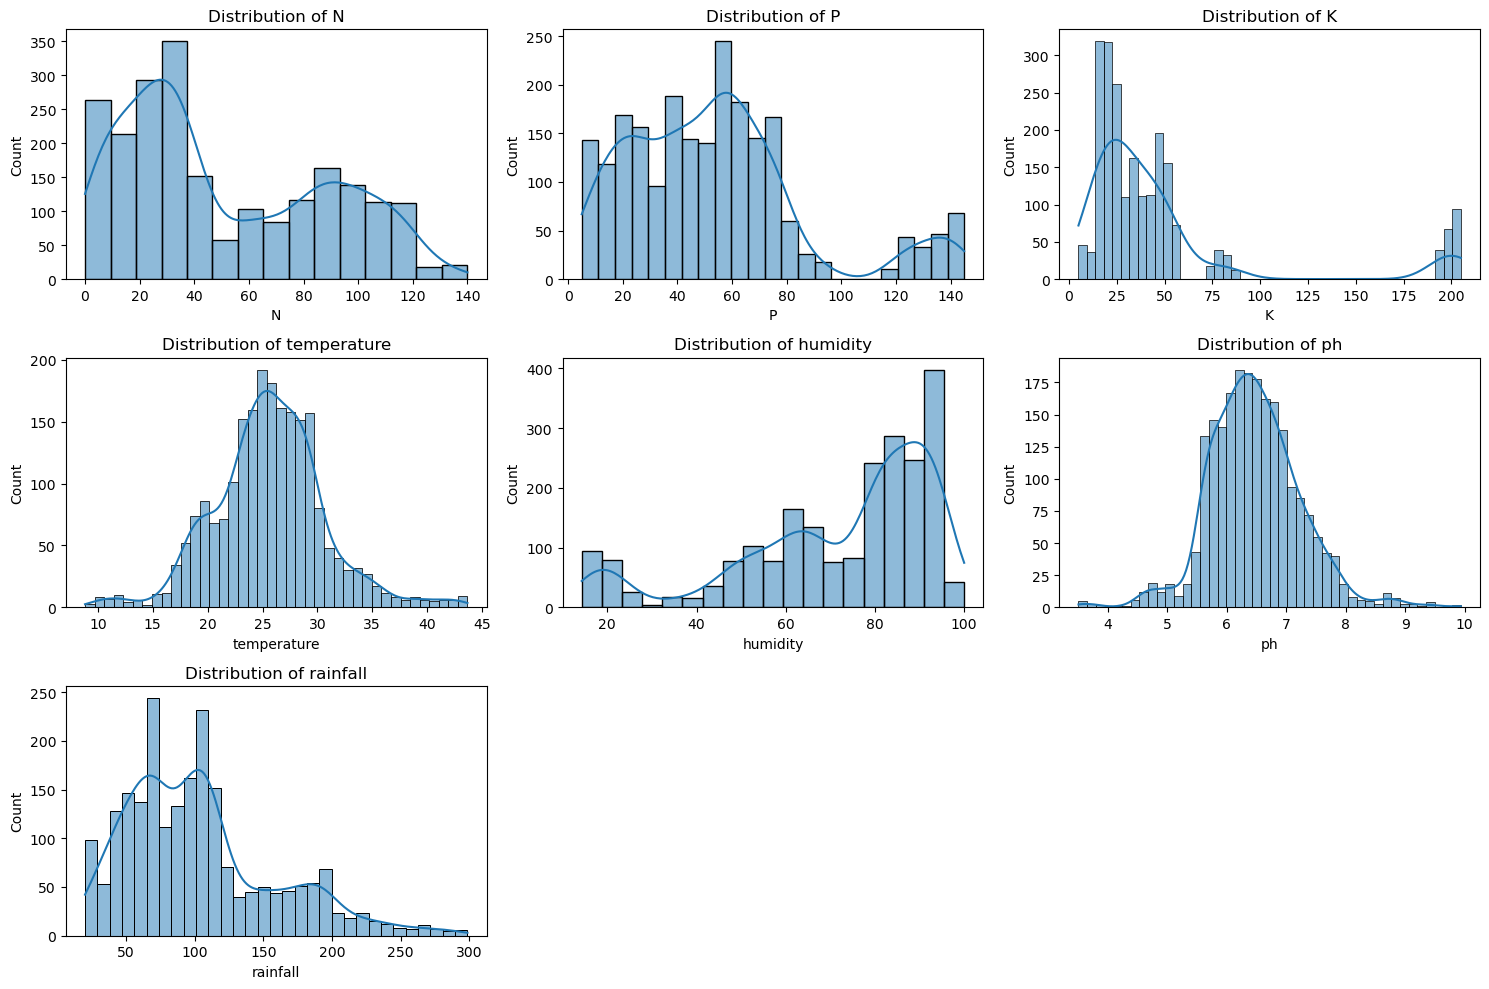

In [16]:
# Exploratory Data Analysis
# Plotting distributions for each feature
plt.figure(figsize=(15, 10))
for i, column in enumerate(crop_data.columns[:-1], 1):  # Exclude the 'label' column (crop type)
    plt.subplot(3, 3, i)
    sns.histplot(crop_data[column], kde=True)
    plt.title(f'Distribution of {column}')
plt.tight_layout()
plt.show()


Each histogram shows the distribution of key soil and environmental factors—nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, pH, and rainfall. By examining the distributions, we can understand the range, central tendencies, and any skewness in each factor.

Nutrient Distributions (N, P, K): These histograms help us identify typical levels of soil nutrients for different crops and detect if certain nutrient levels are predominant. This aids in understanding the nutrient demands for various crops and can guide nutrient management in soils.<br>
Temperature, Humidity, and pH: These plots reveal the environmental conditions under which crops in the dataset grow. For example, a narrow distribution around a certain pH value suggests that most crops prefer a specific soil acidity level.<br>
Rainfall: The distribution of rainfall data provides insight into water requirements for crops. By examining the spread of rainfall values, we can identify which crops are suitable for dry, moderate, or high-rainfall areas.

### Crop Type Frequency Distribution

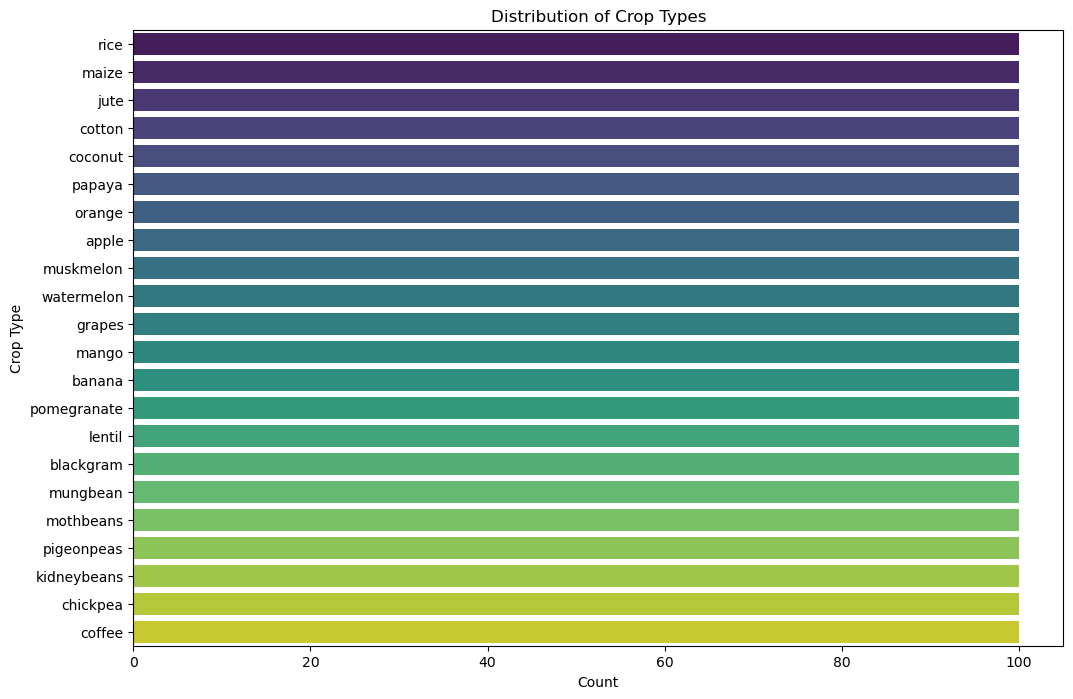

In [17]:
# Bar plot for the crop type distribution
plt.figure(figsize=(12, 8))
crop_counts = crop_data['label'].value_counts()
sns.barplot(y=crop_counts.index, x=crop_counts.values, palette="viridis")
plt.title('Distribution of Crop Types')
plt.xlabel('Count')
plt.ylabel('Crop Type')
plt.show()

This plot helps in understanding the diversity and balance of crops in the dataset. For instance, if certain crops have a higher count, it may indicate a focus on those crops in agricultural recommendations. Additionally, if some crops are underrepresented, it highlights the potential need for more data to make balanced recommendations.
The uniformity or imbalance in crop representation can also affect how generalizable the recommendations are for different conditions.

### Crop Type Proportion in Dataset

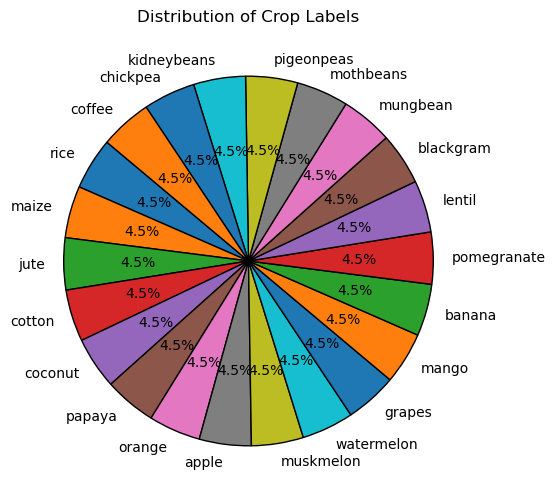

In [18]:
# Count occurrences of each label
label_counts = crop_data['label'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title("Distribution of Crop Labels")
plt.show()

### Scatter Plot Matrix of Environmental Factors

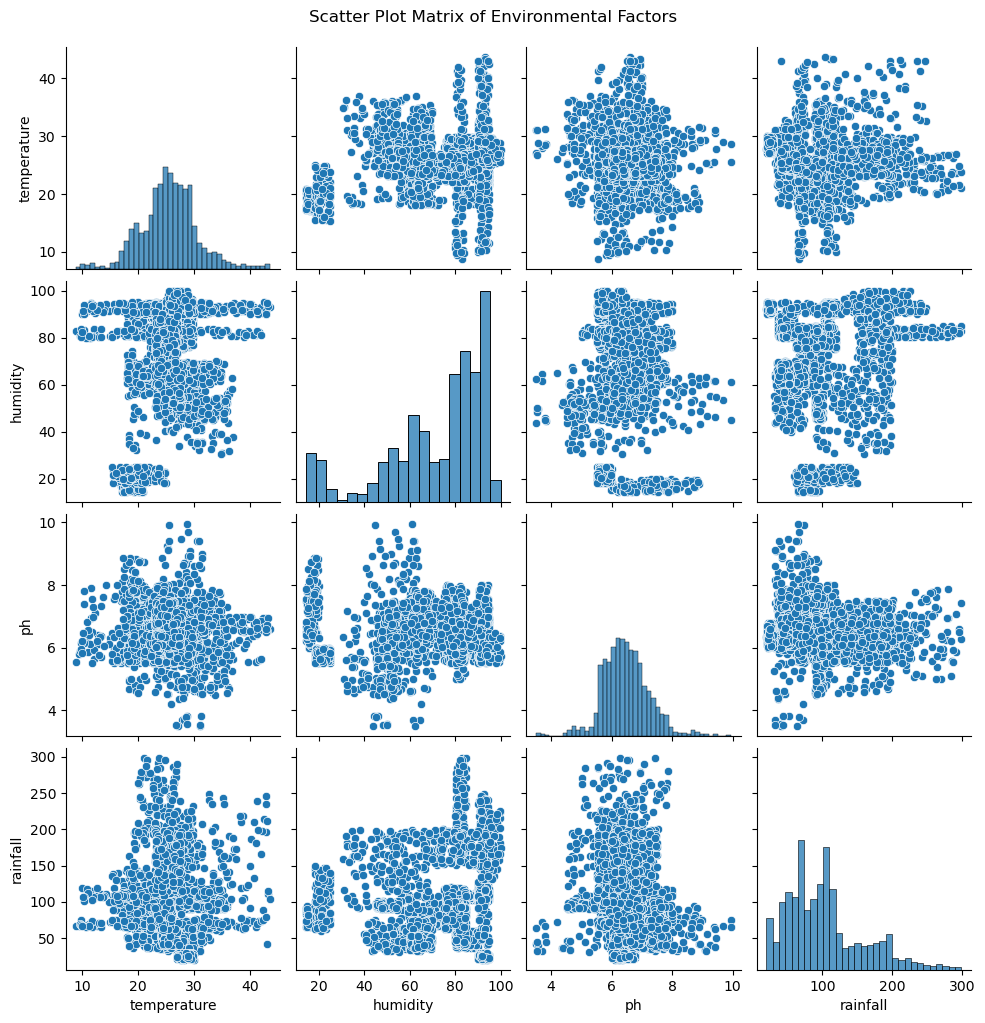

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only the environmental factors for the scatter plot matrix
environmental_factors_no_label = crop_data[['temperature', 'humidity', 'ph', 'rainfall']]

# Plotting the scatter plot matrix without hue
sns.pairplot(environmental_factors_no_label, markers='o')
plt.suptitle("Scatter Plot Matrix of Environmental Factors", y=1.02)
plt.show()


Temperature vs. Humidity: We can observe whether there's any grouping of temperature and humidity values, potentially indicating favorable ranges for crop growth.

pH vs. Rainfall: The plot may reveal specific ranges of pH that align with certain rainfall levels, helpful for understanding the soil and water requirements of different crops.

Overall Trends: The scatter plot matrix allows for a quick visual inspection of all environmental factors, making it easier to detect clusters or relationships that might influence crop recommendations.

### Boxplots of Nutrient Levels and Environmental Factors

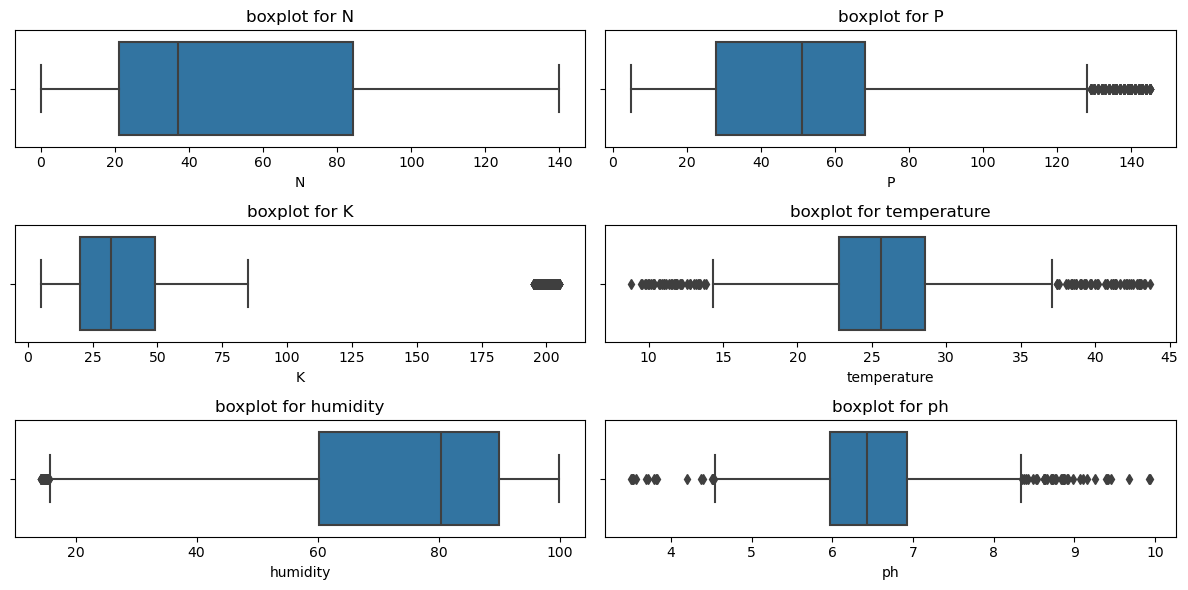

In [20]:
fig,ax=plt.subplots(nrows=3,ncols=2,figsize=(12,6))
ax=ax.flatten()

for i,col in enumerate(crop_data.columns[:len(ax)]):
    sns.boxplot(ax=ax[i],data=crop_data,x=col)
    ax[i].set_title(f'boxplot for {col}')
plt.tight_layout()

These boxplots offer a concise illustration of the distributions of essential environmental and soil factors—nitrogen (N), phosphorus (P), potassium (K), temperature, humidity, and pH. Every boxplot illustrates the range of values for each variable, encompassing the interquartile range (IQR), median, and possible outliers. Outliers, shown as points beyond the "whiskers," indicate extreme values in the dataset. For example, both temperature and pH show many outliers, suggesting that certain environmental conditions notably differ from the mean. Identifying these outliers assists in spotting atypical conditions that could affect crop recommendations. 

The boxplots also illustrate the central tendency and variation of each factor. The median line in each box indicates the central value, whereas the box’s width (the IQR) represents the central 50% of the data. As an example, the average temperature is approximately 25°C, with the majority of values grouped closely together, whereas potassium concentrations seem more stable among samples. This offers a fast visual overview of common values for each factor, which is essential for establishing baseline ranges in crop suggestions, particularly for factors with lower variability, such as potassium and nitrogen. 

Ultimately, these boxplots assist in recognizing skewed distributions and assessing variability between variables. The positions of the median in relation to the whiskers provide insights into skewness, as illustrated in the pH distribution, which shows a slight skew. Differences among factors are clear, showing broader variations in elements such as temperature and tighter limits in nitrogen and potassium. These insights assist in grasping how various factors could influence distinct crop varieties, steering the choice of crops according to standard and severe environmental conditions, ultimately contributing to the enhancement and customization of suggestions for varied agricultural requirements. 

